In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ( "ignore" )
insurance=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data1=pd.read_csv('Insurance data for model building Final.csv')
data1.head(1)
ins=pd.read_csv('Insurance.csv')

In [3]:
ins = ins.drop(['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount'], axis = 1)
ins=ins.join(data1['Customer Lifetime Value_boxcox'])
ins=ins.join(data1['Monthly Premium Auto_boxcox'])
ins=ins.join(data1['Total Claim Amount_boxcox'])
ins.shape

(9134, 24)

In [14]:
insurance.shape

(9134, 24)

In [20]:
ins.shape

(9134, 22)

In [19]:
ins.drop(['Customer','Effective To Date'],axis=1,inplace=True)
ins.head(1)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Customer Lifetime Value_boxcox,Monthly Premium Auto_boxcox,Total Claim Amount_boxcox
0,1,0,0,2,4,0,56274,1,0,32,5,0,1,0,2,0,0,0,1,2.703839,0.685347,33.035752


In [4]:

X=ins.drop(['Customer Lifetime Value_boxcox'],axis=1)
y=ins['Customer Lifetime Value_boxcox']

In [5]:

ins['Coverage'] = ins['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium': 2})
ins['Education'] = ins['Education'].replace({'High School or Below':0, 'College':1, 'Bachelor': 2, 'Master': 3, 'Doctor': 4})
ins['Marital Status'] = ins['Marital Status'].replace({'Married':0, 'Single':1, 'Divorced': 2})
ins['Renew Offer Type'] = ins['Renew Offer Type'].replace({'Offer1':0, 'Offer2':1, 'Offer3': 2, 'Offer4': 3})
ins['Vehicle Class'] = ins['Vehicle Class'].replace({'Two-Door Car':0, 'Four-Door Car':1, 'SUV': 2, 'Luxury SUV': 3, 
                                                   'Sports Car': 4, 'Luxury Car': 5})
ins['State'] = ins['State'].replace({'Washington':1, 'Arizona':2, 'Nevada':3, 'California':4, 'Oregon':5})
ins['Response'] = ins['Response'].replace({'Yes':1, 'No':0})
ins['Gender'] = ins['Gender'].replace({'M':1, 'F':0})
ins['EmploymentStatus'] = ins['EmploymentStatus'].replace({'Unemployed':0, 'Disabled':1, 'Retired':2, 
                                                                 'Medical Leave':3,'Employed':4})
ins['Location Code'] = ins['Location Code'].replace({'Rural':0, 'Suburban':1, 'Urban':2})
ins['Policy Type'] = ins['Policy Type'].replace({'Corporate Auto':0, 'Personal Auto':1, 'Special Auto':2})
ins['Sales Channel'] = ins['Sales Channel'].replace({'Agent':0, 'Call Center':1, 'Web':2,'Branch':3})
ins['Vehicle Size'] = ins['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
ins['Policy'] = ins['Policy'].replace({'Corporate L1':0, 'Corporate L2':1, 'Corporate L3':2, 
                                                                 'Personal L1':3, 'Personal L2':4, 'Personal L3':5,
                                            'Special L1':6, 'Special L2':7, 'Special L3':8})

In [23]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
result = sm.OLS(y, Xc).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Customer Lifetime Value_boxcox   R-squared:                       0.295
Model:                                        OLS   Adj. R-squared:                  0.294
Method:                             Least Squares   F-statistic:                     181.9
Date:                            Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                                    09:47:43   Log-Likelihood:                 20471.
No. Observations:                            9134   AIC:                        -4.090e+04
Df Residuals:                                9112   BIC:                        -4.074e+04
Df Model:                                      21                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -19.9935      0.887    -22.550      0.000     -21.731     -18.255
State                             0.0003      0.000      1.312      0.189      -0.000       0.001
Response                         -0.0016      0.001     -2.005      0.045      -0.003   -3.54e-05
Coverage                         -0.0005      0.001     -0.889      0.374      -0.002       0.001
Education                        -0.0004      0.000     -1.611      0.107      -0.001    8.85e-05
EmploymentStatus                  0.0011      0.000      4.056      0.000       0.001       0.002
Gender                           -0.0008      0.001     -1.384      0.166      -0.002       0.000
Income                          2.22e-08   1.51e-08      1.470      0.142   -7.41e-09    5.18e-08
Location Code                    -0.0001      0.001     -0.196      0.845      -0.001       0.001
Marital Status                   -0.0002      0.000     -0.488      0.626      -0.001       0.001
Months Since Last Claim        2.702e-05   2.68e-05      1.006      0.314   -2.56e-05    7.96e-05
Months Since Policy Inception -9.032e-06   9.72e-06     -0.929      0.353   -2.81e-05       1e-05
Number of Open Complaints        -0.0014      0.000     -4.781      0.000      -0.002      -0.001
Number of Policies                0.0033      0.000     28.692      0.000       0.003       0.003
Policy Type                       0.0020      0.001      1.643      0.101      -0.000       0.004
Policy                           -0.0003      0.000     -0.770      0.441      -0.001       0.000
Renew Offer Type                 -0.0018      0.000     -6.407      0.000      -0.002      -0.001
Sales Channel                    -0.0002      0.000     -0.816      0.415      -0.001       0.000
Vehicle Class                     0.0011      0.000      2.746      0.006       0.000       0.002
Vehicle Size                     -0.0009      0.001     -1.793      0.073      -0.002    8.51e-05
Monthly Premium Auto_boxcox      33.1461      1.294     25.609      0.000      30.609      35.683
Total Claim Amount_boxcox      1.932e-05   3.47e-05      0.557      0.578   -4.87e-05    8.74e-05
==============================================================================
Omnibus:                      871.514   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.161
Skew:                           0.868   Prob(JB):                    4.79e-250
Kurtosis:                       2.982   Cond. No.                     2.82e+08
==============================================================================

Warnings:
[1] Standard Err

In [6]:
X.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'Monthly Premium Auto_boxcox', 'Total Claim Amount_boxcox'],
      dtype='object')

In [ ]:
dir(result)
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(result)

fig, ax = plt.subplots(figsize=(8,6))
y_pred=result.predict(X)
ax.plot(X, y, 'o', label="data")
ax.plot(X, y_pred, 'b-', label="True")
ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

# Assumption 1: Linearity

In [26]:
sm.stats.diagnostic.linear_rainbow(res=result,frac=0.5)

(1.002678472770049, 0.46404588308810557)

### Now check the residual mean and verify using the graph

In [24]:
result.resid.mean()

1.3160851140371919e-12

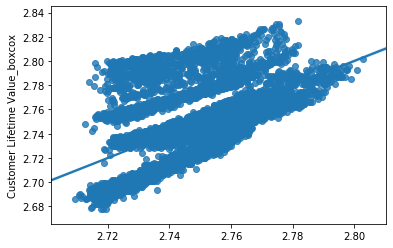

In [41]:
## obs vs predict
sns.regplot(x=result.predict(Xc),y=y)

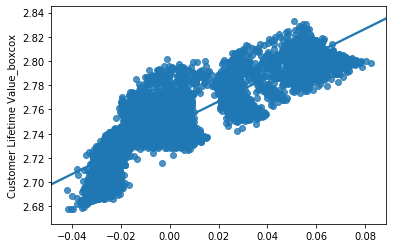

In [40]:
## Residual vs obs
sns.regplot(x=result.resid,y=y)

# Assumption 2:-Normality

In [46]:
from scipy import stats
print(stats.jarque_bera(result.resid))

(1148.161309325257, 0.0)


### Lets now verify using distplot and QQ Plot

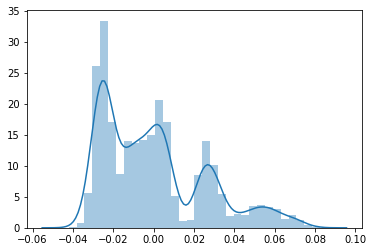

In [42]:
residuals= result.resid
sns.distplot(residuals)
plt.show()

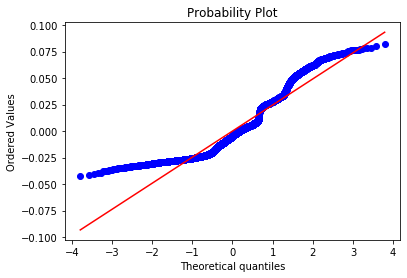

In [47]:
stats.probplot(residuals,plot=plt)
plt.show()

# 3) AutoCoorelation

In [ ]:
As the Durbin Watson score is 2.017 hence we conclude that there is no auto-correlation

### Lets now verify using Plots

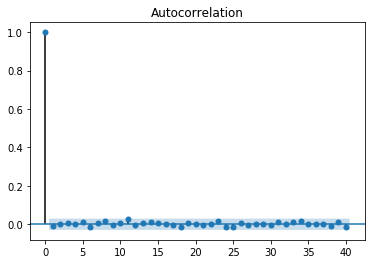

In [30]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(result.resid,lags=40,alpha=0.005)
acf.show()

# Assumption 4:-Homoscadescity

In [54]:
import statsmodels.stats.api as sms
name = ['F-statistic','p-value']
test = sms.het_goldfeldquandt(y=result.resid, x=Xc)
test

(1.0743311950754215, 0.007836608636998218, 'increasing')

### Lets now verify using Plots

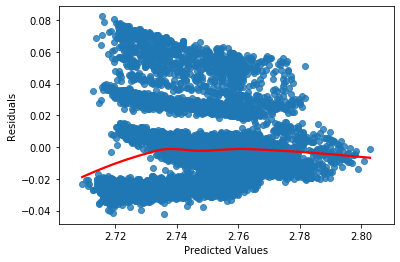

In [65]:
y_pred = result.predict(Xc)
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Assumption 5:-Multicollinearity


If no features are correlated, then all values for VIF will be 1.

In [63]:

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Monthly Premium Auto_boxcox,Total Claim Amount_boxcox
vif,1.002247,1.05128,2.021457,1.029463,2.884869,1.01587,2.898766,1.331907,1.058547,1.006523,1.012887,1.002718,1.010701,4.440922,4.438808,1.099403,1.011255,2.451771,1.024297,3.827212,2.294516


### Lets now verify using Plots

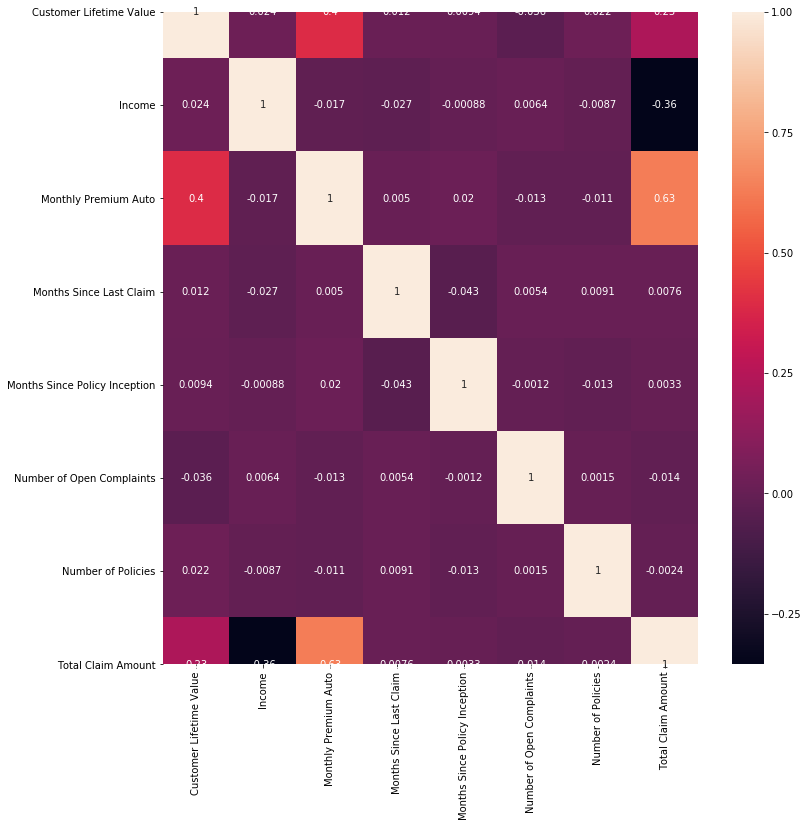

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(ins.corr(),annot=True)